# 01_EDA.ipynb
## Análise Exploratória de Dados (EDA)

# Objetivo:
Exploração inicial do dataset de classificação de fake news, buscando compreender suas características estruturais e textuais antes do desenvolvimento dos modelos.

# O que ele faz:
1) Inspeção geral do dataset
2) Verificação de registros duplicados
3) Análise das classes
4) Análise textual: Comprimento dos textos e distribuição por classe
5) Frequência de palavras

In [18]:
# 1) Inspeção geral do dataset
df.head()

,id,title,text,subject,date,label
0,13355,"Exclusive: Pentagon, Lockheed near deal on $9 ...",WASHINGTON (Reuters) - The U.S. Department of ...,politicsNews,"January 19, 2017",0
1,2113,“HILL”ARIOUS…MUST SEE! IOWA PARADE GOERS Treat...,HILL larious! If this was a Donald Trump pi a...,left-news,"Aug 3, 2016",1
2,27667,Philippine leader says 'no way' he'll do deal ...,MANILA (Reuters) - Philippine President Rodrig...,worldnews,"September 9, 2017",0
3,15368,Biden asks U.S. Congress to allow unencumbered...,WASHINGTON (Reuters) - Vice President Joe Bide...,politicsNews,"September 8, 2016",0
4,6934,Trump Claims ‘Any Negative Polls’ Are ‘FAKE N...,Donald Trump kicked off his Monday morning by ...,News,"February 6, 2017",1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22844 entries, 0 to 22843
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       22844 non-null  int64 
 1   title    22844 non-null  object
 2   text     22844 non-null  object
 3   subject  22844 non-null  object
 4   date     22844 non-null  object
 5   label    22844 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.0+ MB


In [20]:
df.describe(include="all")

,id,title,text,subject,date,label
count,22844.000000,22844,22844,22844,22844,22844.000000
unique,NaN,22103,22195,8,2274,NaN
top,NaN,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",NaN
freq,NaN,12,152,9028,142,NaN
mean,14268.892269,NaN,NaN,NaN,NaN,0.250000
std,8255.023756,NaN,NaN,NaN,NaN,0.433022
min,1.000000,NaN,NaN,NaN,NaN,0.000000
25%,7139.500000,NaN,NaN,NaN,NaN,0.000000
50%,14288.500000,NaN,NaN,NaN,NaN,0.000000
75%,21444.250000,NaN,NaN,NaN,NaN,0.250000


In [21]:
# 2) Verificação de registros duplicados

df.duplicated(subset=['title','text']).sum()

np.int64(501)

In [22]:
# Remoção das duplicatas para garantir que as análises sejam realizadas sobre o mesmo dataset que será utilizado no treinamento dos modelos.
df = df.drop_duplicates(subset=['title', 'text'])

In [23]:
# 3) Análise das classes

df['label'].value_counts()
df['label'].value_counts(normalize=True)

,proportion
label,
0,0.760686
1,0.239314


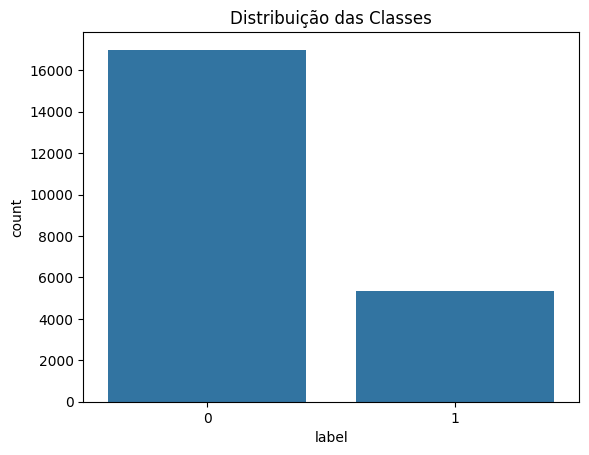

In [24]:
sns.countplot(x='label', data=df)
plt.title("Distribuição das Classes")
plt.show()

In [25]:
# 4) Análise textual: Comprimento dos textos e distribuição por classe

df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
df['title_length'] = df['title'].apply(lambda x: len(str(x).split()))

#Observação:
O comprimento textual foi mensurado em número de palavras. Embora essa variável seja tecnicamente discreta, a elevada cardinalidade e a natureza quantitativa do atributo permitem tratá-la como aproximadamente contínua para fins de análise estatística e visualização.

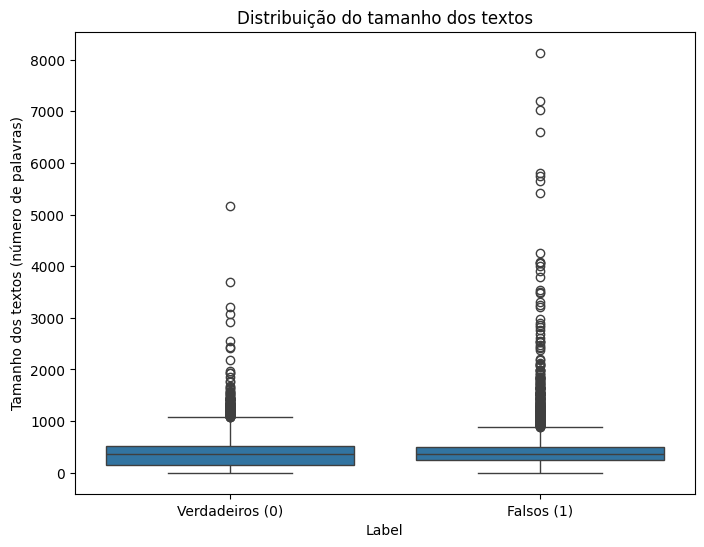

In [26]:
plt.figure(figsize=(8,6))

sns.boxplot(
    data=df,
    x='label',
    y='text_length'
)

plt.xlabel('Label')
plt.ylabel('Tamanho dos textos (número de palavras)')
plt.title("Distribuição do tamanho dos textos")

plt.xticks([0,1], ['Verdadeiros (0)', 'Falsos (1)'])

plt.show()

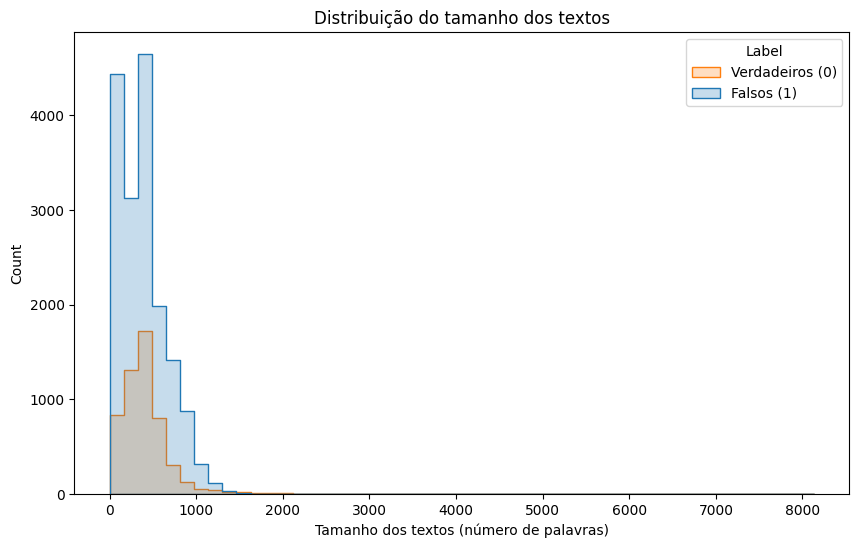

In [27]:
plt.figure(figsize=(10,6))

sns.histplot(
    data=df,
    x='text_length',
    hue='label',
    bins=50,
    stat='count',
    element='step',
    common_norm=False
)

plt.xlabel('Tamanho dos textos (número de palavras)')
plt.ylabel('Count')
plt.title("Distribuição do tamanho dos textos")

plt.legend(title='Label', labels=['Verdadeiros (0)', 'Falsos (1)'])

plt.show()


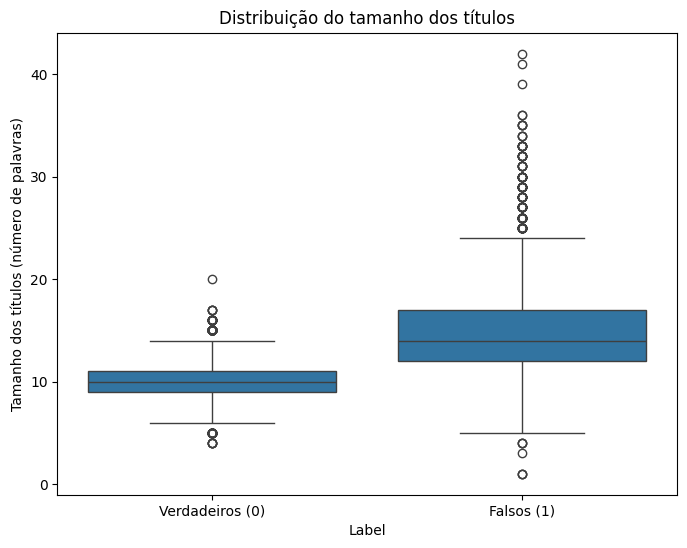

In [28]:
plt.figure(figsize=(8,6))

sns.boxplot(
    data=df,
    x='label',
    y='title_length'
)

plt.xlabel('Label')
plt.ylabel('Tamanho dos títulos (número de palavras)')
plt.title("Distribuição do tamanho dos títulos")

plt.xticks([0,1], ['Verdadeiros (0)', 'Falsos (1)'])

plt.show()

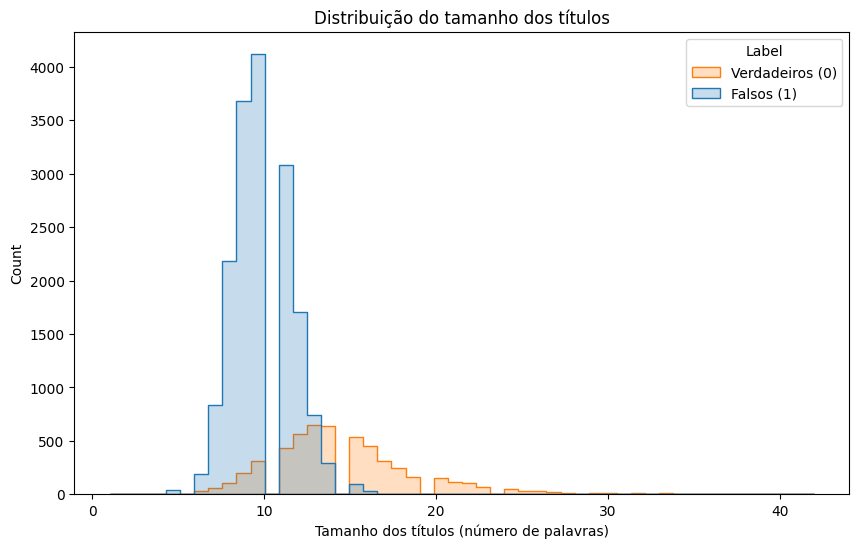

In [29]:
plt.figure(figsize=(10,6))

sns.histplot(
    data=df,
    x='title_length',
    hue='label',
    bins=50,
    stat='count',
    element='step',
    common_norm=False
)

plt.xlabel('Tamanho dos títulos (número de palavras)')
plt.ylabel('Count')
plt.title("Distribuição do tamanho dos títulos")

plt.legend(title='Label', labels=['Verdadeiros (0)', 'Falsos (1)'])

plt.show()

In [30]:
# 5) Frequência de palavras

vectorizer = CountVectorizer(stop_words='english', max_features=20)
X_counts = vectorizer.fit_transform(df['text'])

print(vectorizer.get_feature_names_out())

['clinton' 'donald' 'election' 'government' 'house' 'new' 'obama' 'party'
 'people' 'president' 'republican' 'reuters' 'said' 'state' 'states'
 'told' 'trump' 'united' 'washington' 'year']


In [31]:
def top_words(text_series, n_words=20):

    vectorizer = CountVectorizer(
        stop_words='english'
    )

    X = vectorizer.fit_transform(text_series)

    word_counts = X.sum(axis=0).A1
    words = vectorizer.get_feature_names_out()

    freq_df = pd.DataFrame({
        'word': words,
        'count': word_counts
    })

    freq_df = freq_df.sort_values(by='count', ascending=False)

    return freq_df.head(n_words)


In [32]:
true_text = df[df['label'] == 0]['text']
top_true_text = top_words(true_text)

display(top_true_text)

,word,count
47920,said,78766
56099,trump,43312
46573,reuters,23001
43097,president,22382
52180,state,16789
23534,government,15017
37920,new,13387
52195,states,13266
46185,republican,13133
26224,house,13106


In [33]:
fake_text = df[df['label'] == 1]['text']
top_fake_text = top_words(fake_text)

display(top_fake_text)

,word,count
47344,trump,18693
40419,said,7603
36338,president,6319
34798,people,5944
25851,just,4701
10485,clinton,4366
15153,donald,4327
27791,like,4159
32861,obama,3983
32067,news,3251


# Conclusão:
A análise exploratória permitiu identificar características importantes do dataset que orientaram decisões metodológicas nas etapas seguintes:

> 1) Qualidade dos dados:

- Não foram identificados valores faltantes.
- O conteúdo textual encontra-se majoritariamente em língua inglesa, garantindo consistência para aplicação de técnicas de NLP.

> 2) Possíveis fontes de viés não linguístico:

- A variável subject apresentou indícios de associação com categorias editoriais, podendo induzir o modelo a aprender padrões de origem ou contexto em vez de características linguísticas.
- Observou-se desalinhamento temporal entre as classes, indicando que a variável date poderia introduzir sinais artificiais de classificação. Além de que, a utilização explícita de informações temporais poderia levar o modelo a capturar padrões de períodos específicos, em vez de características linguísticas intrínsecas.
- Por essas razões, optou-se por não utilizar subject e date na modelagem principal, priorizando maior validade metodológica e generalização.

> 3) Duplicatas no dataset:

- Foram identificadas duplicações completas de registros (título e texto idênticos), as quais foram removidas para evitar sobreajuste e viés na avaliação experimental.

> 4) Desbalanceamento dos dados:

- Observa-se desbalanceamento moderado entre as classes, com predominância de notícias verdadeiras. Esse fator será considerado nas etapas de modelagem por meio de técnicas como divisão estratificada, class_weight="balanced" e ajuste de threshold com base no F1-score, reduzindo viés para a classe majoritária.

> 5) Características textuais relevantes:

- Notícias falsas apresentaram maior variabilidade no comprimento textual, incluindo valores extremos superiores aos observados na classe verdadeira.
- Observou-se alta frequência do termo “Reuters” em notícias verdadeiras, sugerindo possível leakage editorial, no qual o modelo poderia associar a fonte à veracidade da notícia.


Os achados do EDA orientaram decisões de pré-processamento e seleção de variáveis, contribuindo para a construção de modelos mais robustos, interpretáveis e metodologicamente consistentes.